Understanding the data
Survival : 0 = No, 1 = Yes

Pclass : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

sibsp : The # of siblings / spouses aboard the Titanic Sibling = brother, sister, stepbrother, stepsister Spouse =

husband, wife (mistresses and fiancés were ignored)

parch : The # of parents / children aboard the Titanic Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

Ticket : Ticket number

Fare : Passenger fare

Cabin : Cabin number embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Name, Sex , Age are self-explanatory

**Importing all necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data**

In [4]:
train_data = pd.read_csv(r'C:\Users\P Kalyani Jyothirmai\Downloads\train.csv')
test_data = pd.read_csv(r'C:\Users\P Kalyani Jyothirmai\Downloads\test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data['PassengerId'] = train_data['PassengerId'].astype(float)
train_data['Survived'] = train_data['Survived'].astype(float)
train_data['Pclass'] = train_data['Pclass'].astype(float)
train_data['SibSp'] = train_data['SibSp'].astype(float)
train_data['Parch'] = train_data['Parch'].astype(float)

In [11]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that total number of columns in test data is one less than that in train data.
The missing column in the test data is survived column which we have to predict using suitable machine learning algorithm

In [12]:
print("Total number of rows in training data ", train_data.shape[0])
print("Total number of columns in training data ", train_data.shape[1])
print("Total number of rows in test data ", test_data.shape[0])
print("Total number of columns in test data ", test_data.shape[1])

Total number of rows in training data  891
Total number of columns in training data  12
Total number of rows in test data  418
Total number of columns in test data  11


**Data visualization and Analysis**

Visualizing the number of null values in both data

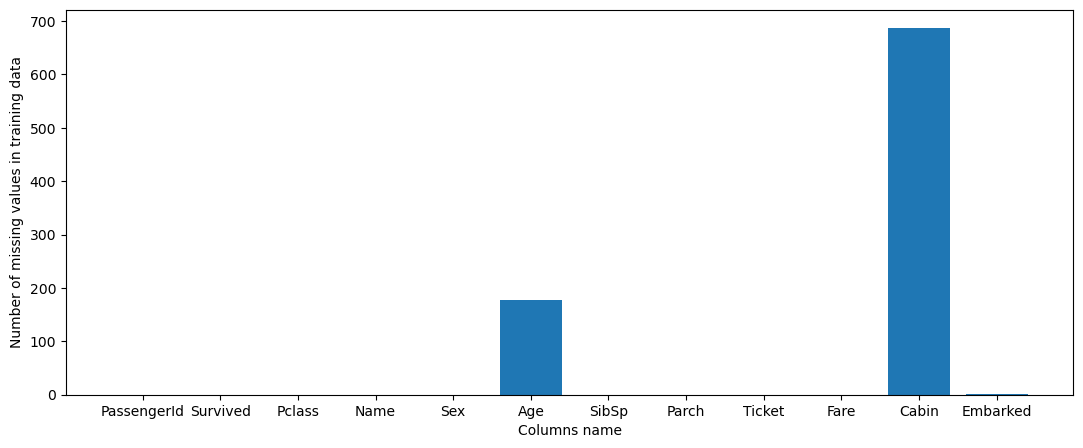

In [13]:
plt.figure(figsize = (13,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()
# from the bar plot of missing value we can conclude that Cabin, Embarked and Cabin column has null value so, we 
# can either drop the entire row or can fill the nan value with some values like mean, meadian. 


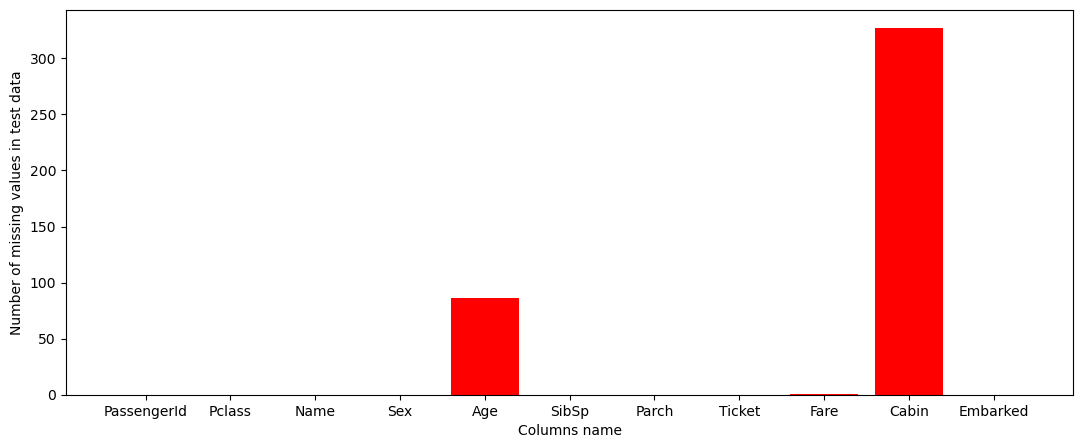

In [14]:
plt.figure(figsize = (13,5))
plt.bar(test_data.columns, test_data.isnull().sum().values, color = 'red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in test data")
plt.show()
# similarly we can conclude that Age Cabin and Fare column has nan values .

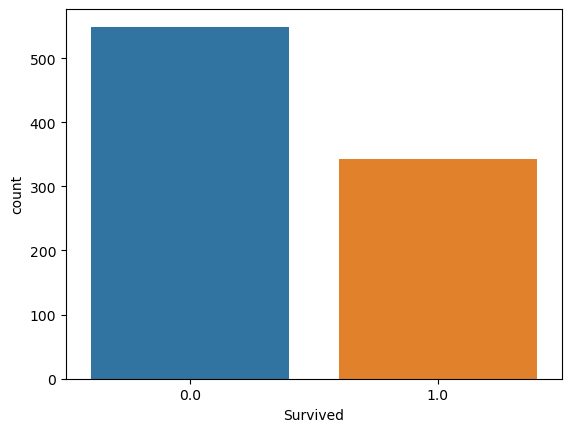

In [15]:
#Visualizing the Number of survived passenger
sns.countplot(x='Survived', data=train_data)
plt.show()
# here we plot only for train_data as we donot have Survived column for test data,
# This plot show that around 600 people died while around 300 survived

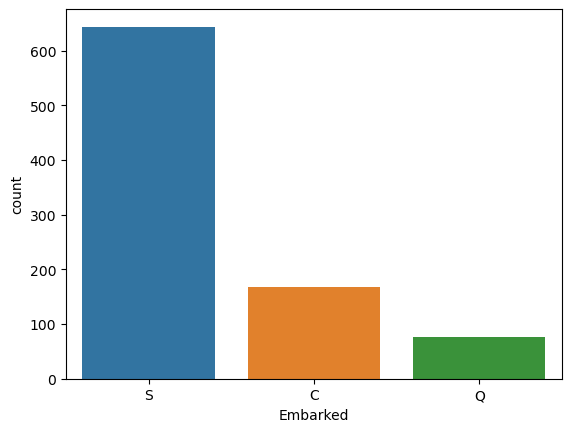

In [16]:
# visualizing the number of passenger from different embarked column in train_data
sns.countplot(x='Embarked', data = train_data)
plt.show()

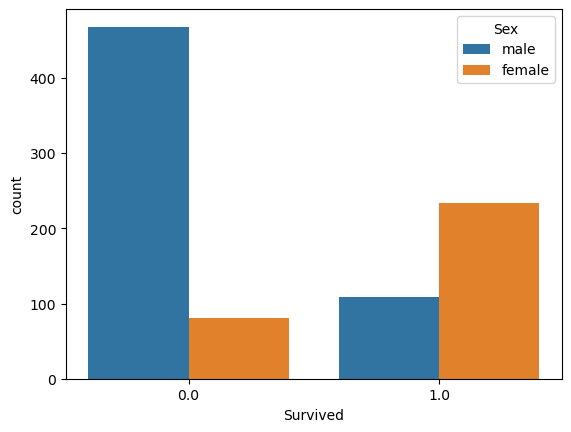

In [17]:
#visualizing whether gender affect the survival rate or not
sns.countplot(x='Survived', hue = 'Sex', data = train_data)
plt.plot()
plt.show()
# the graph clearly show that death rate for male passenger is way more than that for female

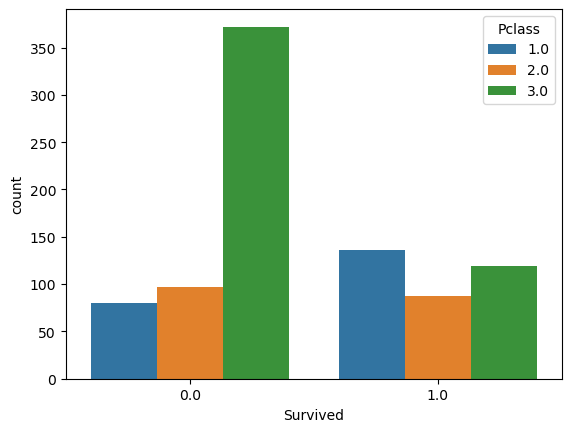

In [18]:
# visualizing whether pclass affect the survial rate or not
sns.countplot(x="Survived", hue = 'Pclass', data = train_data)
plt.show()
# this graph clearly show that people in third class are more likely to die 

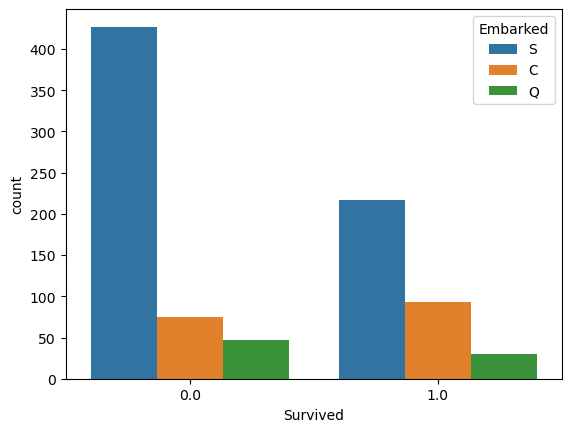

In [19]:
# visualizing whether embarked place affects the survival rate or not
sns.countplot(x='Survived', hue = 'Embarked', data = train_data)
plt.show()

Box and whisker plot

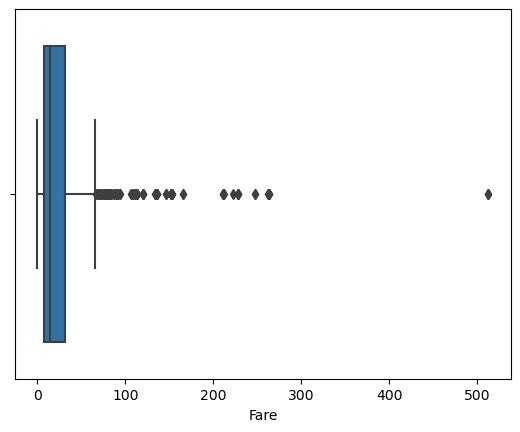

In [20]:
sns.boxplot(x='Fare', data = train_data)
plt.show()
# this shows that there were very few people who payed more than 100

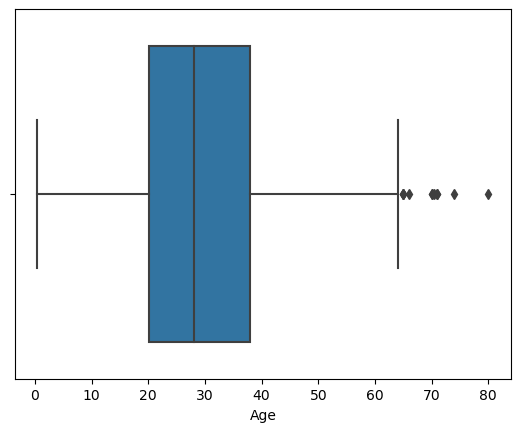

In [21]:
sns.boxplot(x='Age', data = train_data)
plt.show()
# this shows that there were very few people more than 65 years old in training data

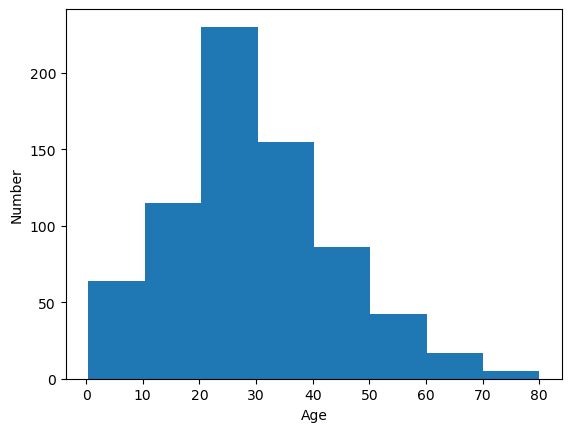

In [22]:
# ploting histogram
# choosing value for bin 
interval = 10
value_for_bin = np.ceil((train_data.Age.max() - train_data.Age.min()) / interval).astype(int)

plt.hist(train_data.Age, bins = value_for_bin)
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()
# this shows that lots of passenger we from age between 20 to 40

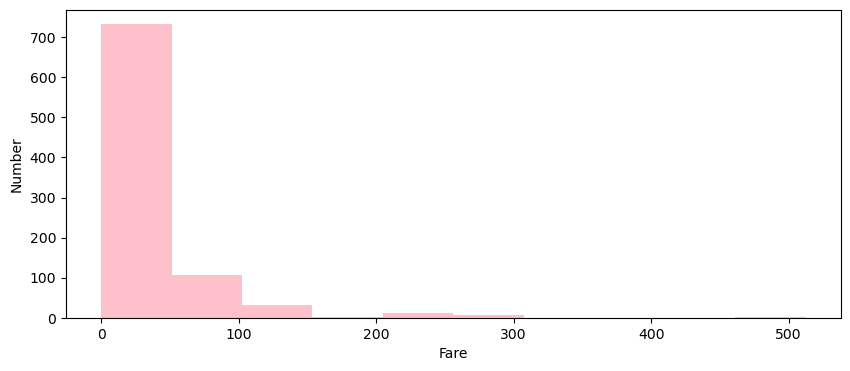

In [23]:
plt.figure(figsize = (10,4))
plt.hist(train_data.Fare, bins = 10, color = 'pink')
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()
# this shows that around 700 people pay in between 0 and 50

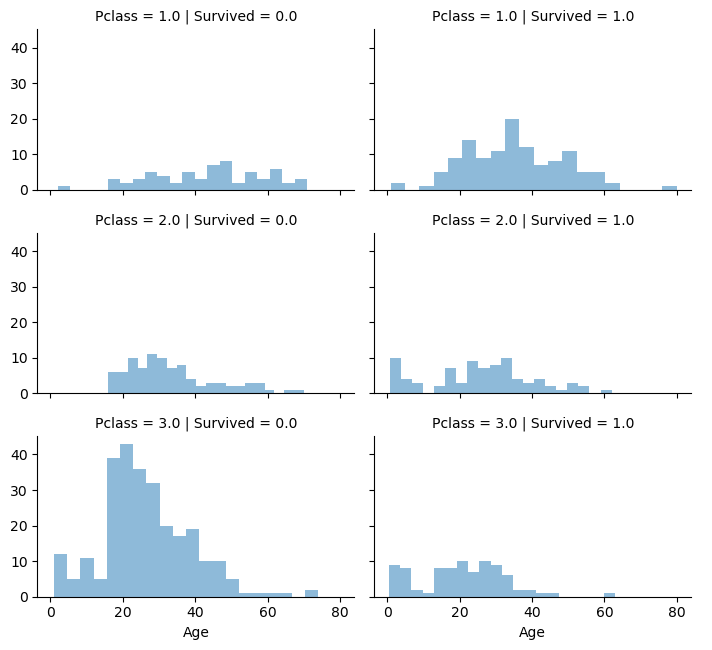

In [24]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\n_users\jyothi\lib\site-packages\seaborn\axisgrid.py

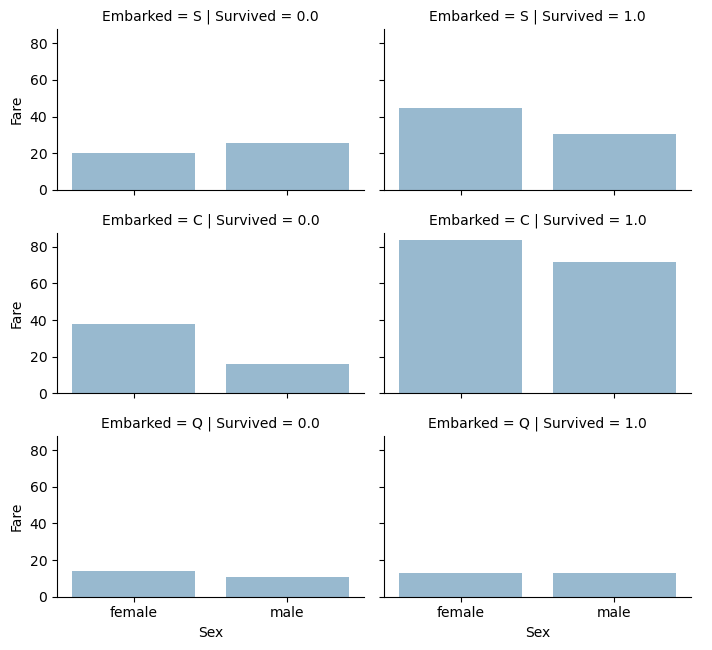

In [25]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

C:\Users\P Kalyani Jyothirmai\AppData\Local\Temp\ipykernel_27224\1293806725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train_data.corr()


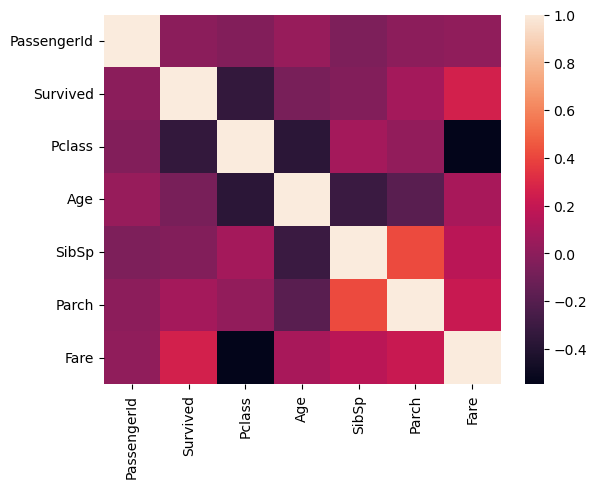

In [26]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()
# this shows that SibSp and Parch columns are releted , so we can combine this two column to reduce the dimension
# of our data.. this plot only works for columns with numercal data )

**Simple Data Analysis**

Survival rate for male and female

In [27]:
((train_data.groupby(['Sex','Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())
# this shows that female have around 74% chance of survival while male have around 81% chance of death

Sex     Survived
female  0.0         25.796178
        1.0         74.203822
male    0.0         81.109185
        1.0         18.890815
Name: Survived, dtype: float64

Survival rate on the basis of Pclass

In [28]:
(train_data.groupby(['Pclass','Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count()
# this shows that people belonging to third class are likely to die while people in class one are likely to survive

Pclass  Survived
1.0     0.0         37.037037
        1.0         62.962963
2.0     0.0         52.717391
        1.0         47.282609
3.0     0.0         75.763747
        1.0         24.236253
Name: Survived, dtype: float64

Survival rate on the basis of Embarked place

In [29]:
(train_data.groupby(['Embarked','Survived']).Survived.count() * 100) / train_data.groupby('Embarked').Survived.count()
# this shows that people who embarked from Southampton are likely to die

Embarked  Survived
C         0.0         44.642857
          1.0         55.357143
Q         0.0         61.038961
          1.0         38.961039
S         0.0         66.304348
          1.0         33.695652
Name: Survived, dtype: float64

In [30]:
train_data.groupby(by=['Survived']).mean()["Age"]
# this show that average age of people who survived was around 28 years old

C:\Users\P Kalyani Jyothirmai\AppData\Local\Temp\ipykernel_27224\3018503544.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby(by=['Survived']).mean()["Age"]


Survived
0.0    30.626179
1.0    28.343690
Name: Age, dtype: float64

Dealing with the Missing values

In [31]:
# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [32]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)
      

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [33]:
# filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
    
# from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
train_data.Embarked.fillna('S', inplace = True)
# we simply can use SimpleImputer class form the sklearn to deal with the missing value
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# train_data[['Age']] = impute.fit_transform(train_data[['Age']])

**Converting a categorical feature**

Let's start by converting Sex feature to categorical female=1 and male=0

In [34]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)
# we simply can use mapfunction to change the gender
# train_data.Sex = train_data.Sex.map({'female':1, 'male':0})

using map funcion to change the Embarked column S = 1, C = 2, Q = 0

In [35]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

**Feature Extraction**

while visualizing the correlation heatmap we came to know that Sibsp and Parch columns were closely related so lets created new column called Alone using this two columns   1 = Alone , 0 = not Alone

In [36]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [37]:
# now lets drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

Creating new feature Title extracting from existing feature Name

In [38]:
train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().size
# there are total 17 unique title

17

In [39]:
# lets create the Title feature which contain the title of the passenger and drop Name column
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)

In [40]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [41]:
test_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [42]:
#lets replace least occuring title in the data with rare
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

In [43]:
# lets perform title mapping in order to change to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

Dropping PassengerId and Ticket column

In [44]:
columns_to_drop = ['PassengerId','Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

Binning Age and Fare columns

In [45]:
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [46]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

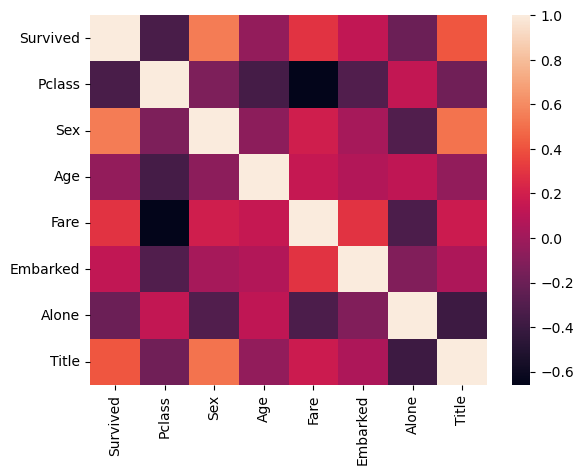

In [47]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()

preparing training and testing data

In [48]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 7)
Shape of Y_train (891,)
Shape of x_test (418, 7)


In [49]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,3.0,0,1.0,1.0,1,0,1
1,1.0,1,2.0,3.0,2,0,3
2,3.0,1,1.0,1.0,1,1,2
3,1.0,1,2.0,3.0,1,0,3
4,3.0,0,2.0,1.0,1,1,1
...,...,...,...,...,...,...,...
886,2.0,0,1.0,1.0,1,1,5
887,1.0,1,1.0,2.0,1,1,2
888,3.0,1,1.0,1.0,1,0,2
889,1.0,0,1.0,2.0,2,1,1


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
 5   Alone     891 non-null    int64  
 6   Title     891 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [51]:
#x_train = np.asarray(X_train).astype('float32')

In [52]:
#y_train = np.asarray(Y_train).astype('float32')

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Alone     418 non-null    int64  
 6   Title     418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [54]:
#x_test = np.asarray(X_test).astype('float32')

Import necessary libraries

In [55]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

**Defining model**

*Here, I have used different number of neurons for each layer and different value for dropout. You can play with these hyperparameter for better output.*

In [56]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (7,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

**Model summary**

In [57]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2048      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               8192      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8192      
                                                        

**Compiling and fitting model**

In [59]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)

Epoch 1/50
28/28 - 4s - loss: 0.5905 - acc: 0.6947 - 4s/epoch - 129ms/step
Epoch 2/50
28/28 - 0s - loss: 0.5013 - acc: 0.7677 - 97ms/epoch - 3ms/step
Epoch 3/50
28/28 - 0s - loss: 0.4650 - acc: 0.7789 - 106ms/epoch - 4ms/step
Epoch 4/50
28/28 - 0s - loss: 0.4565 - acc: 0.7924 - 111ms/epoch - 4ms/step
Epoch 5/50
28/28 - 0s - loss: 0.4464 - acc: 0.7845 - 93ms/epoch - 3ms/step
Epoch 6/50
28/28 - 0s - loss: 0.4287 - acc: 0.8171 - 92ms/epoch - 3ms/step
Epoch 7/50
28/28 - 0s - loss: 0.4452 - acc: 0.8092 - 95ms/epoch - 3ms/step
Epoch 8/50
28/28 - 0s - loss: 0.4140 - acc: 0.8182 - 112ms/epoch - 4ms/step
Epoch 9/50
28/28 - 0s - loss: 0.4180 - acc: 0.8159 - 107ms/epoch - 4ms/step
Epoch 10/50
28/28 - 0s - loss: 0.4178 - acc: 0.8114 - 93ms/epoch - 3ms/step
Epoch 11/50
28/28 - 0s - loss: 0.4111 - acc: 0.8227 - 92ms/epoch - 3ms/step
Epoch 12/50
28/28 - 0s - loss: 0.4054 - acc: 0.8159 - 109ms/epoch - 4ms/step
Epoch 13/50
28/28 - 0s - loss: 0.4103 - acc: 0.8294 - 103ms/epoch - 4ms/step
Epoch 14/50
28/

Prediction for test data

In [60]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

14/14 [==============================] - 0s 2ms/step
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


For submission

In [61]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)

In [62]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

28/28 [==============================] - 0s 2ms/step
Precision :  86.16
Accuracy :  85.07
Recall :  72.81
F1 score :  78.92
AUC :  82.76


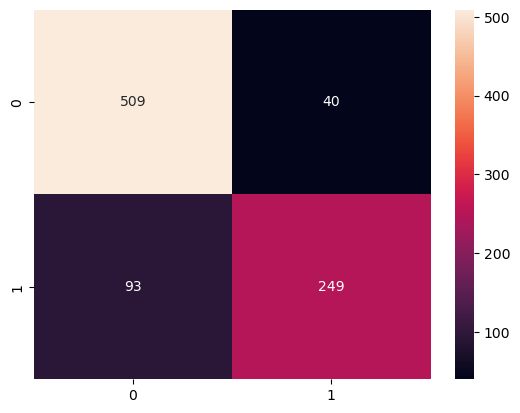

In [63]:
# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()